In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import torch
from torch import nn

# Download training data from open datasets
training_data = datasets.MNIST(
 root="data",
 train=True,
 download=True,
 transform=ToTensor(),
)
# Download test data from open datasets
test_data = datasets.MNIST(
 root="data",
 train=False,
 download=True,
 transform=ToTensor(),
)
batch_size = 32
# Create data loaders / split data into mini batches
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
device = (
 "cuda"
 if torch.cuda.is_available()
 else "mps"
 if torch.backends.mps.is_available()
 else "cpu"
)


class LeNet(nn.Module):

  #implementing LeNet Algo from class
    def __init__(self):
        super(LeNet, self).__init__()
        self.ConvLayer1 = nn.Conv2d(1, 6, kernel_size=5, padding = 0) #zero padding in the first layer
        self.Sigmoid = nn.Sigmoid()
        self.Pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.ConvLayer2 = nn.Conv2d(6, 16, kernel_size=5,padding = 2)
        self.Linear1 = nn.Linear(16 * 7 * 7, 120)
        self.Linear2 = nn.Linear(120, 84)
        self.Linear3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.Sigmoid(x)
        x = self.Pool1(x)
        x = self.ConvLayer2(x)
        x = self.Sigmoid(x)
        x = self.Pool1(x)

        #dense layers
        x = torch.flatten(x, start_dim=1) #flattening to prepare for all to all dense layers
        x = self.Linear1(x)
        x= self.Sigmoid(x)
        x = self.Linear2(x)
        x = self.Sigmoid(x)
        x = self.Linear3(x)
        return x

lenetmodel = LeNet()
loss_fnQ3 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenetmodel.parameters(), lr=0.001)

def train(train_dataloader, model, loss_fn, optimizer):
  model.train()
  total_loss_in_epoch = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    total_loss_in_epoch = total_loss_in_epoch + loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  return total_loss_in_epoch/ len(train_dataloader)

def test(test_dataloader, model, loss_fn):
  num_batches = len(test_dataloader)
  model.eval()
  test_loss = 0
  with torch.no_grad():
    # Iterate over all batches of test data
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss = test_loss + loss_fn(pred, y).item()

  return test_loss/num_batches


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49


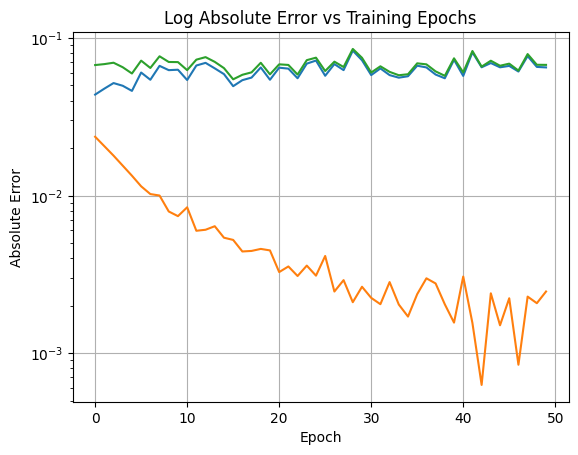

In [ ]:
epochs = 50
training_losses = []
testing_losses = []
for t in range(epochs):
  print("Epoch:", t) #For tracking where the code is at
  training_losses.append(train(train_dataloader, lenetmodel, loss_fnQ3, optimizer))
  testing_losses.append(test(test_dataloader, lenetmodel, loss_fnQ3))

absolute_error = [abs(a - b) for a, b in zip(training_losses, testing_losses)]

plt.plot(list(range(epochs)), absolute_error)
plt.plot(list(range(epochs)), training_losses)
plt.plot(list(range(epochs)), testing_losses)
plt.title("Log Absolute Error vs Training Epochs")
plt.xlabel("Epoch")
plt.ylabel(" Error")
plt.yscale('log')
plt.grid(True)
plt.show()


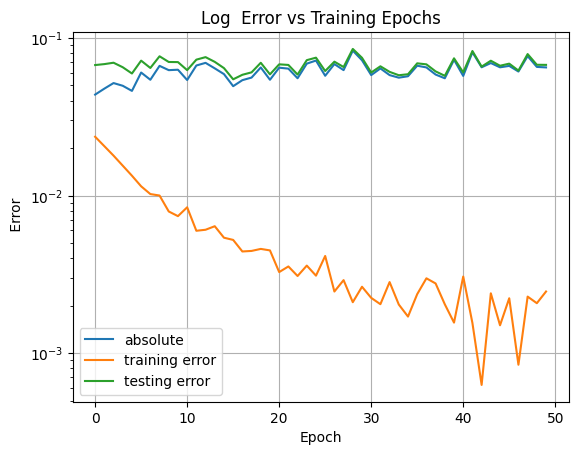

In [ ]:

plt.plot(list(range(epochs)), absolute_error, label='absolute')
plt.plot(list(range(epochs)), training_losses, label='training error')
plt.plot(list(range(epochs)), testing_losses, label = 'testing error')
plt.legend()
plt.title("Log  Error vs Training Epochs")
plt.xlabel("Epoch")
plt.ylabel(" Error")
plt.yscale('log')
plt.grid(True)
plt.show()


If we analyze the graph above we can see that the testing error is relatively constant with slight fluctuations but the training error is decreasing. This could indicate the model is overfitting, as it is having a harder time decreasing the error for new unseen test data, but is perfectly fine with decreasing error with the training data. In assignment 3 there was better convergence in my model, indicating that it might be a better fit. Also it took way less time to run so it was more computationally efficent, making the model in assignment 3 a better fit for this task.
